In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_context('talk')

In [34]:
url = '../data/sysarmy_survey_2020_processed.csv'

# Or we can use this other URL if we are in google colab and we want to read the dataset directly from a server.
# url = 'https://www.famaf.unc.edu.ar/~nocampo043/sysarmy_survey_2020_processed.csv'

df = pd.read_csv(url)

## Boxen Plot of Filtered Monthly Net Salary

The following plot is a Boxen plot that visualizes the distribution of monthly net salaries in the dataset. Boxen plots are an enhanced version of box plots, displaying more quantiles, which allows for a better understanding of the shape of the data distribution, particularly for detecting outliers and revealing the tail behavior.

In this particular case, we have filtered the salary data to exclude outliers that are more than 2.5 standard deviations away from the mean salary. This filtering aims to provide a cleaner view of the salary distribution, focusing on the most commonly occurring values.

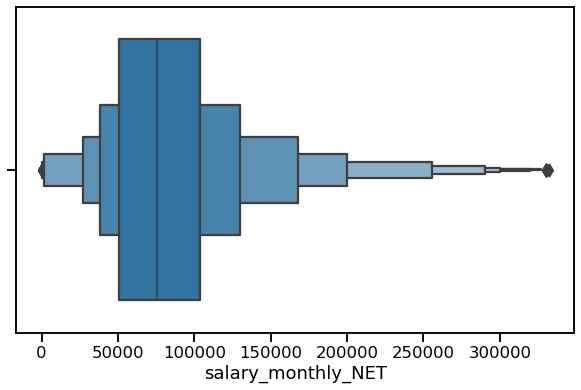

In [35]:
salary_col = df["salary_monthly_NET"]
df_filtered = df[(salary_col - salary_col.mean()).abs() <= 2.5 * salary_col.std()]

plt.figure(figsize=(10, 6))
sns.boxenplot(data=df_filtered, x="salary_monthly_NET")
plt.savefig("boxenplot_slides.png")

## FacetGrid Plot of Monthly Net Salaries by Education Level

In the upcoming plot, we employ a FacetGrid to visualize the distribution of monthly net salaries, segregated by different levels of educational qualifications (profile_studies_level). A FacetGrid allows us to map a data variable onto multiple subplots categorized by one or more additional variables. In this case, each subplot corresponds to a unique level of education.

The FacetGrid makes it easier to compare the salary distributions across different educational qualifications side-by-side. Each subplot is a histogram that displays the frequency of monthly net salaries within each educational level. This kind of visualization is helpful for identifying patterns or disparities in salary distributions associated with education.

We have retained the filtered dataset to exclude outliers that are more than 2.5 standard deviations away from the mean salary, as with the previous plot.

<Figure size 1440x864 with 0 Axes>

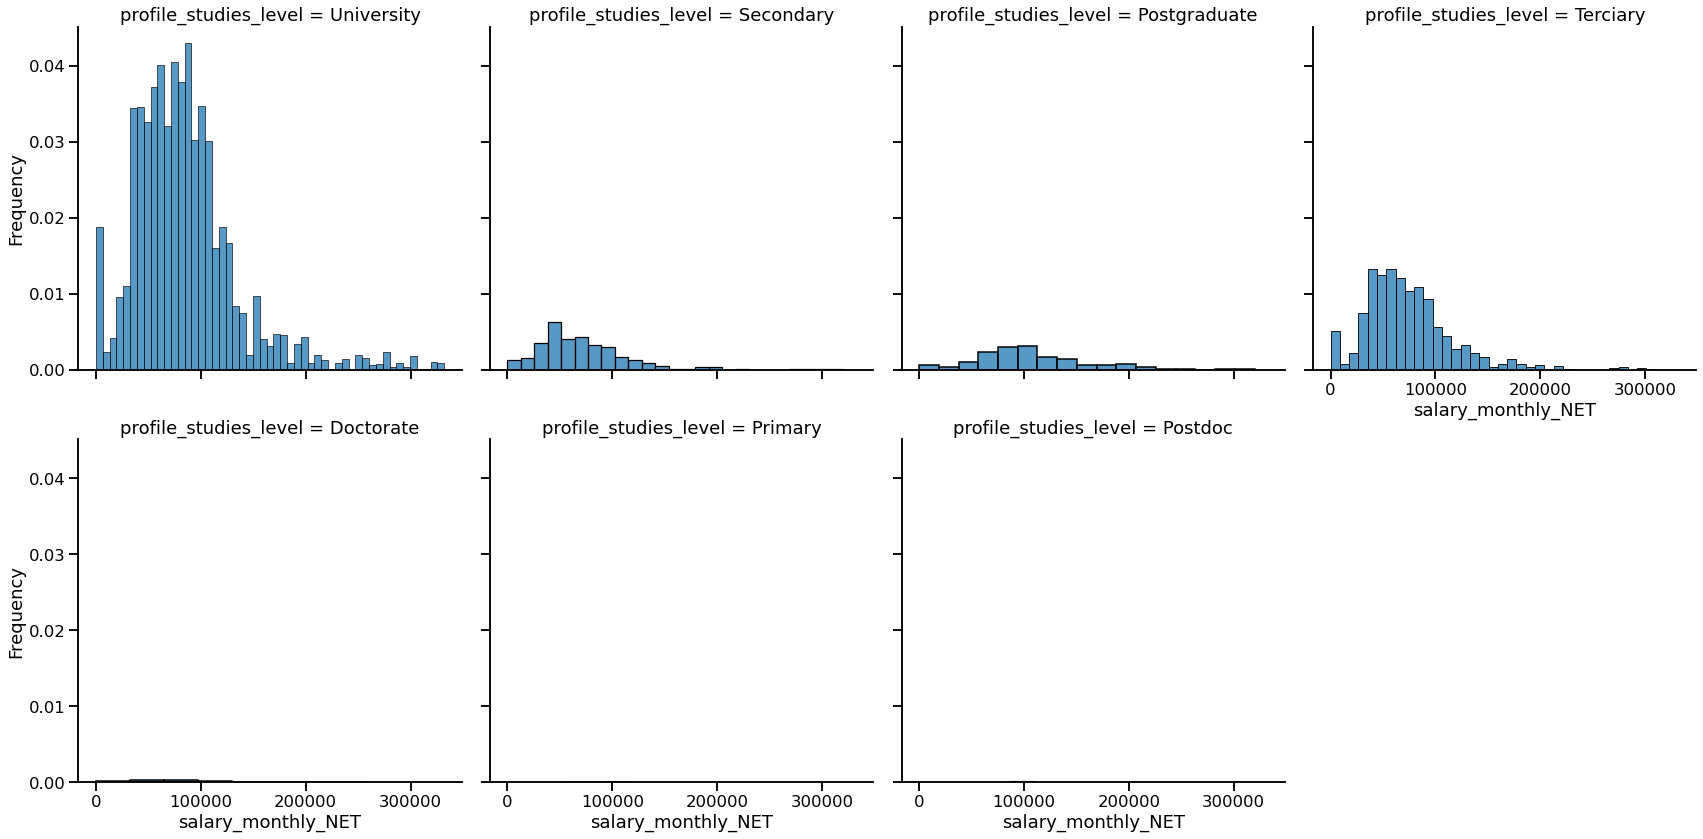

In [36]:
plt.figure(figsize=(20,12))
g = sns.FacetGrid(df_filtered, col="profile_studies_level", height=6, col_wrap=4)
g.map_dataframe(sns.histplot, x="salary_monthly_NET", stat="frequency")
plt.savefig("facetgrid_slides.png")

## Plot Styles

The upcoming Boxen plot visualizes monthly net salaries, but with a twist: we've set the color of the plot to orange using the color attribute. This simple customization can be used to align the plot's aesthetics with specific themes or to make it stand out.

<AxesSubplot:xlabel='salary_monthly_NET'>

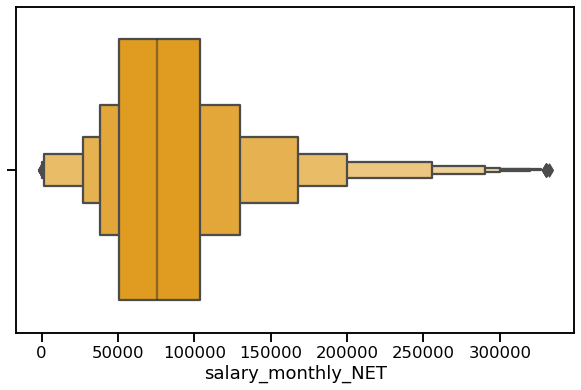

In [39]:
plt.figure(figsize=(10, 6))
sns.boxenplot(data=df_filtered, x="salary_monthly_NET", color="orange")

In the following scatter plot, we examine the relationship between monthly gross and net salaries, categorized by work contract type ("Part-Time" or "Full-Time"). The alpha parameter is set to 0.5, adding a level of transparency to the data points.

This transparency helps in visualizing the density of points, making it easier to distinguish areas of overlap.

<AxesSubplot:xlabel='salary_monthly_GROSS', ylabel='salary_monthly_NET'>

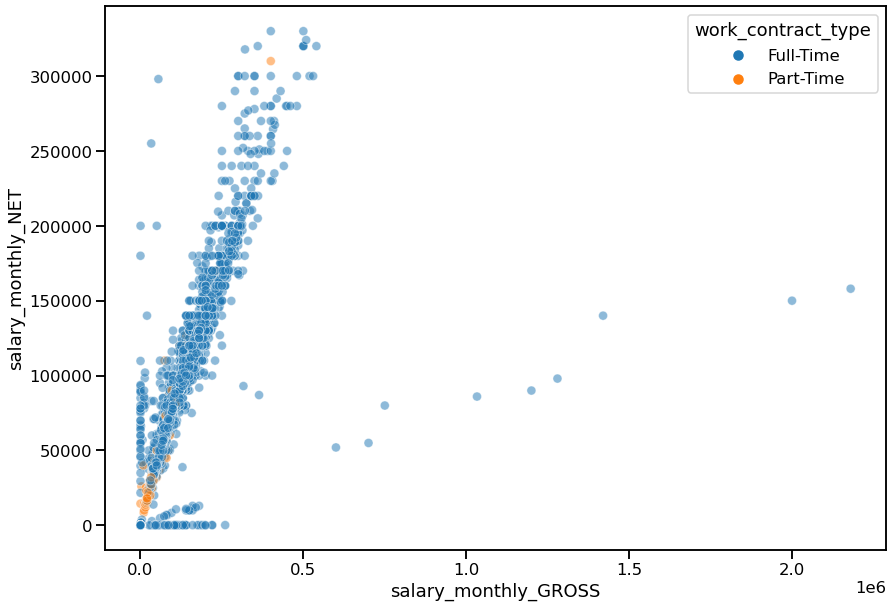

In [42]:
plt.figure(figsize=(14, 10))
sns.scatterplot(
    data=df_filtered[df_filtered["work_contract_type"].isin(["Part-Time", "Full-Time"])],
    x="salary_monthly_GROSS",
    y="salary_monthly_NET",
    hue="work_contract_type",
    alpha=0.5)

The markers parameter is employed to differentiate the work contract types using custom shapes: "X" for Part-Time and "s" (square) for Full-Time.

<AxesSubplot:xlabel='salary_monthly_GROSS', ylabel='salary_monthly_NET'>

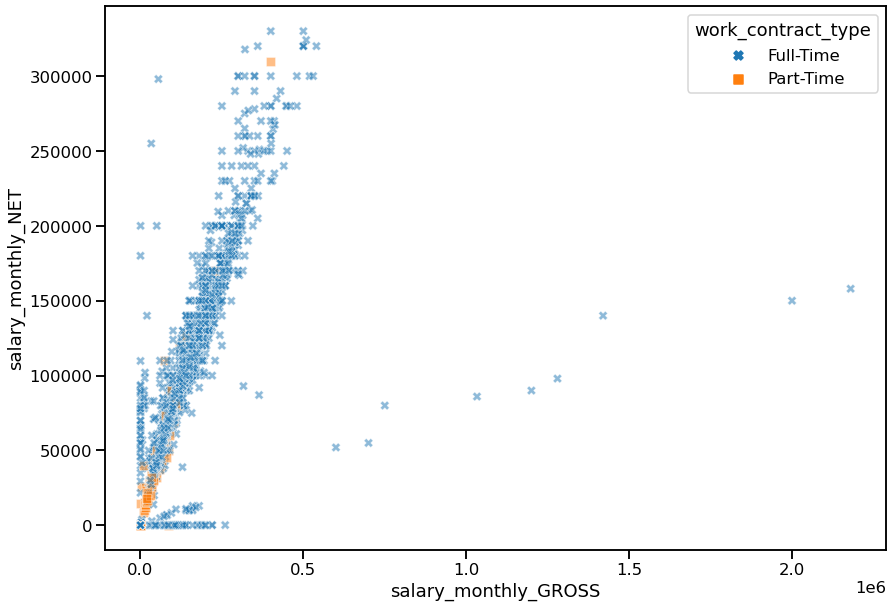

In [45]:
plt.figure(figsize=(14, 10))
sns.scatterplot(
    data=df_filtered[df_filtered["work_contract_type"].isin(["Part-Time", "Full-Time"])],
    x="salary_monthly_GROSS",
    y="salary_monthly_NET",
    hue="work_contract_type",
    style="work_contract_type",
    markers=["X", "s"],  # "o" for circle, "s" for square
    alpha=0.5
)

Besides using the alpha parameter for transparency and the markers parameter for custom shapes, we also apply the xlim method to set the x-axis limits.

Setting the x-axis range from 0 to 600,000 with xlim allows us to focus on a specific part of the data distribution without filtering the dataset. This is useful for zooming into ranges of interest while retaining the full data context.

(0.0, 600000.0)

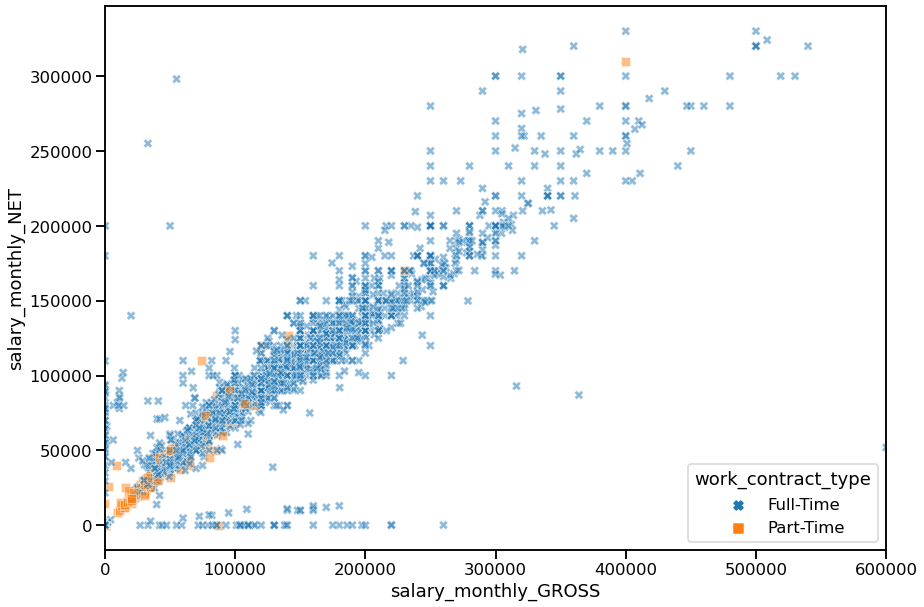

In [48]:
plt.figure(figsize=(14, 10))
sns.scatterplot(
    data=df_filtered[df_filtered["work_contract_type"].isin(["Part-Time", "Full-Time"])],
    x="salary_monthly_GROSS",
    y="salary_monthly_NET",
    hue="work_contract_type",
    style="work_contract_type",
    markers=["X", "s"],  # "o" for circle, "s" for square
    alpha=0.5
)
plt.xlim(0, 600000)

The s parameter is particularly useful when you want to emphasize the individual data points or make them more visually accessible in a busy plot. In this case, we've set s to 200 to make the markers more prominent.

(0.0, 600000.0)

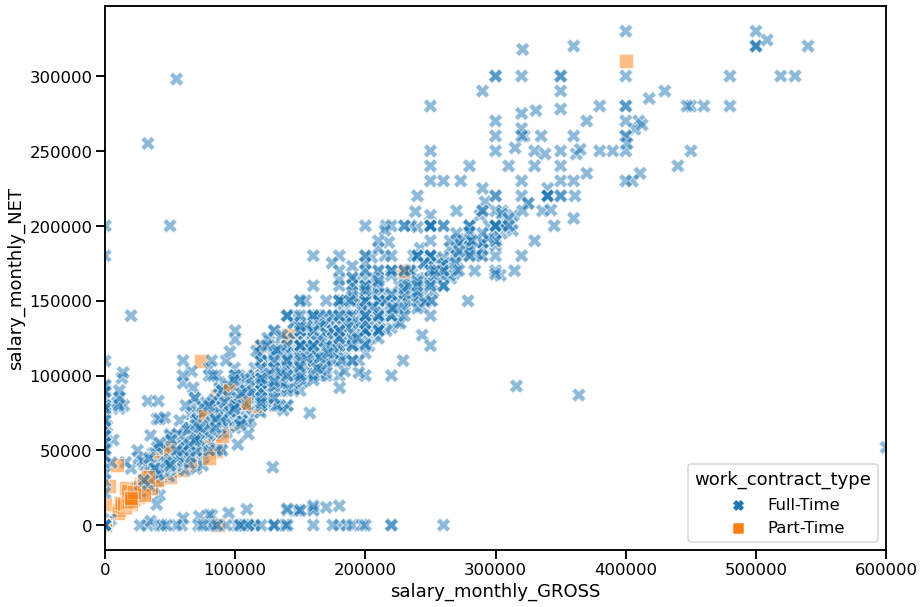

In [49]:
plt.figure(figsize=(14, 10))

sns.scatterplot(
    data=df_filtered[df_filtered["work_contract_type"].isin(["Part-Time", "Full-Time"])],
    x="salary_monthly_GROSS",
    y="salary_monthly_NET",
    hue="work_contract_type",
    style="work_contract_type",
    markers=["X", "s"],
    s=200,
    alpha=0.5
)

plt.xlim(0, 600000)


## Decision Boundary and Confusion Matrix in Classification

We will be using a synthetic dataset created with two features to showcase how to visualize a decision boundary and a confusion matrix after training a logistic regression model.

### The Data

We generated a synthetic dataset with two informative features to keep it visually interpretable. This dataset is divided into training and test sets, ensuring that we have separate data for model validation.

### Model Training

We use a Logistic Regression model from Scikit-learn and train it on our dataset. Logistic Regression is a simple yet powerful classification algorithm.

### Creation

After training the model, we plot the decision boundary by creating a meshgrid spanning the minimum and maximum values of our features. We then make predictions across this grid. The predict function maps each point in the grid to a label, allowing us to visualize the regions corresponding to each class.

### Visualization

We use plt.contourf to fill the contour lines based on these predictions, thus creating the decision boundary. The color shades represent the predicted class labels over the feature space.

Additionally, we overlay scatter plots of both the training and test data, with markers 'o' and 's' to distinguish between them. The colors match the class labels. This allows us to see how well our model separates the two classes and how well it generalizes to unseen data.
Confusion Matrix

Finally, we plot a confusion matrix using Scikit-learn’s plot_confusion_matrix. This matrix provides a summarized view of how well our classifier is performing, showing the number of true positives, false positives, true negatives, and false negatives.

/user/nocampo/home/miniconda3/envs/phd-corpora/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


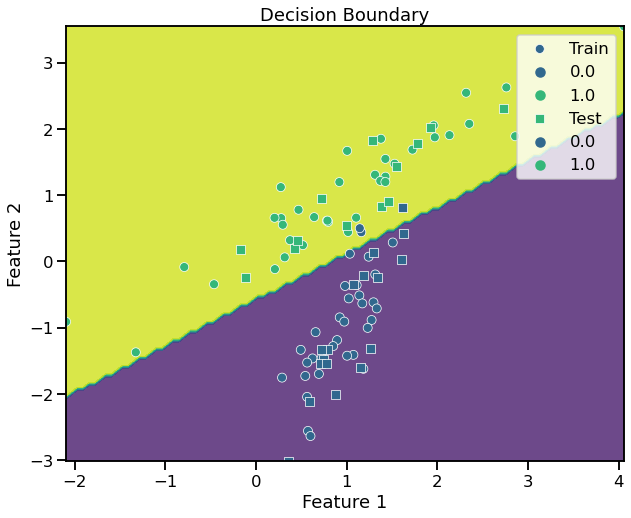

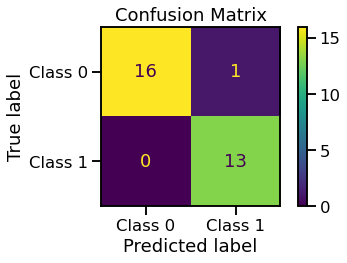

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix

# Create a synthetic dataset
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           n_clusters_per_class=1, n_classes=2)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train logistic regression model
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Test the model
y_pred = clf.predict(X_test)

#Create a larger figure for the decision boundary plot
plt.figure(figsize=(10, 8))

# Plot decision boundary
xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 100))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)

# Create a DataFrame for seaborn plotting
import pandas as pd
df_train = pd.DataFrame(np.c_[X_train, y_train], columns=['Feature1', 'Feature2', 'Label'])
df_test = pd.DataFrame(np.c_[X_test, y_test], columns=['Feature1', 'Feature2', 'Label'])

# Use seaborn to create the scatter plot
sns.scatterplot(x='Feature1', y='Feature2', hue='Label', data=df_train, marker='o', palette='viridis', label='Train')
sns.scatterplot(x='Feature1', y='Feature2', hue='Label', data=df_test, marker='s', palette='viridis', label='Test')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Decision Boundary')
plt.savefig("decision_boundary_slides.png")

# Plot confusion matrix
plot_confusion_matrix(clf, X_test, y_test, display_labels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.tight_layout()
plt.savefig("confusion_matrix_slides.png")
